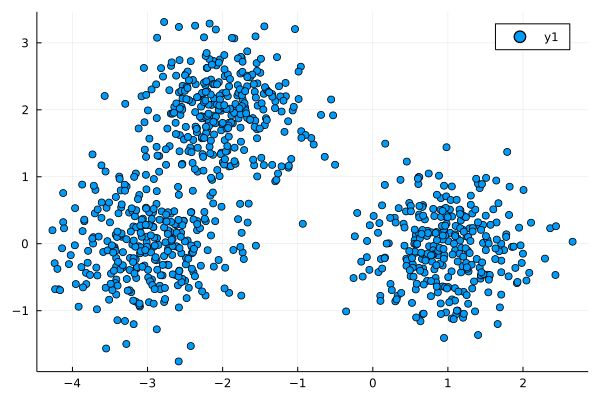

In [13]:
using Distributions
using Plots

function generate_cluster(centre; r = 1, n = 10)
    # generates a cluster of points in 2D
    C = [r 0; 0 r]
    d = MvNormal(centre, C)
    return rand(d, n)
end

# generate 3 clusters
points = [generate_cluster([1,0], r=0.3, n=300) generate_cluster([-3,0], r=0.3, n=300) generate_cluster([-2,2], r=0.3, n=300)]
n = size(points)[2]
scatter(points[1,:],points[2,:])


## Markov Chain
Define a kernel that represents some notion of affinity between data points.

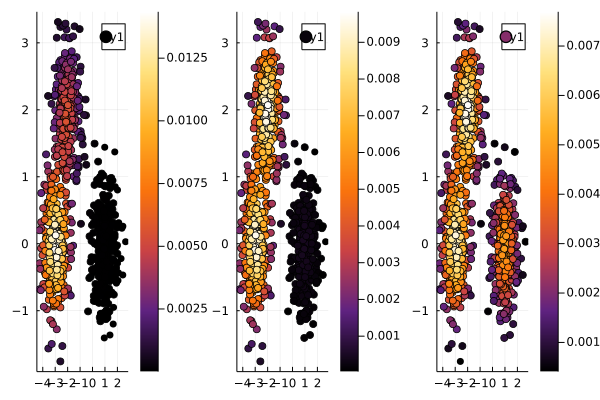

In [97]:
using Distances
k(x,y;ϵ=0.5) = exp(-Euclidean()(x,y)^2/ϵ) # Gaussian kernel

ker_matrix = [k(points[:,i],points[:,j]) for i = 1:n, j = 1:n]
d = sum(ker_matrix, dims=1)

P = [ker_matrix[i,j]/d[i] for i = 1:n, j = 1:n]
# sum(P,dims=2) # check that row sums are equal to 1 (right stochastic)

f = zeros(1,n); f[301] = 4
t=20
f = f*P^t

p1 = scatter(points[1,:], points[2,:], zcolor=(f*P^2)', c=:sunset)
p2 = scatter(points[1,:], points[2,:], zcolor=(f*P^100)', c=:sunset)
p3 = scatter(points[1,:], points[2,:], zcolor=(f*P^2000)', c=:sunset)
plot(p1,p2,p3,layout=(1,3))